##### 4 Nov 2019 

# Data Visualization with `pyplot` 

#### Reading: 

* The tutorial at `matplotlib.org`
  * select `matplotlib` from the Help menu in a Jupyter notebook)
  * click on Tutorials, then Pyplot Tutorial

#### List Comprehension

Most examples in this notebook use lists of numbers 
* the lists are created using **list comprehension**
* see the notes in `comprehensions.ipynb`

## How to Use this Notebook 

This notebook is an introduction to a very large and complex topic
* there will be lots of examples
* the goal is to give you an idea of what's possible

![sine waves](https://pages.uoregon.edu/conery/Bi410/sine_waves.png)

What you should take away from this lecture
* we can make line plots
* lines can have different colors and styles
* plots have labels and text

What you should **not** do is try to memorize the names of the functions and their arguments

Plan on looking up that information when you need it
* this notebook (and the next one) will have examples of functions you need for projects and exams
* there is a **lot** more to be found on-line
* learn to browse documentation

## Graphics Libraries 

Data scientists have several choices for applications to generate images based on data
* Mathematica
* MATLAB
* R
* many, many more

If we want to use Python we also have lots of choices for graphics libraries
* `matplotlib` (the one described in this notebook)
* `ggplot` #grammer of graphics
* `bokeh` (interactive graphics for web apps)
* many more


## `matplotlib` is in the Docker Container

The library most often used with Jupyter is `matplotlib`

It's already part of our Bi 410 container:
```
jovyan@fb4b89cce5b6:~$ pip show matplotlib
Name: matplotlib
Version: 3.1.1
Summary: Python plotting package
...
```

**Note:** If you are not using Docker you might have to install `matplotlib` yourself
* probably already installed as part of Jupyter
* if not, use `pip` or `conda` [come see us if you need help]

## Graphics in a Notebook 

To have images produced by `matplotlib` included directly in a Juypter notebook execute this statement in a code cell:

In [1]:
%matplotlib inline

## `pyplot` 

The name `matplotlib` is short for "Matlab style graphics in Python"

`pyplot` is a subset of the full library
* simpler to use
* conventions and syntax that is more familiar to Python programmers

### Import (the Hard Way)

As with all libraries, we have to import the parts we're going to use

One way is to import the name of the library, and then refer to the functions using their full name

Example: the function named `bar` will draw a bar chart:
```
>>> import matplotlib.pyplot
>>> matplotlib.pyplot.bar(...)
```

### Import (a Better Way) 

It's going to be tedious typing (and reading!) `matplotlib.pyplot` all the time

The common idiom for importing the library:

In [2]:
import matplotlib.pyplot as plt

Now we can refer to functions in the library using the syntax `plt.x`

Example:  `plt.bar` draws a bar chart

### Other Libraries 

The demos in this notebook use two other libraries to make the data for the examples:

In [3]:
from math import *
from random import randint, uniform, normalvariate

## The Simplest Plot 

A very basic plot consists of a set of points with lines connecting them
* define lists of $x$ and $y$ coordinates
* draw lines from $(x_0,y_0)$ to $(x_1,y_1)$, then to $(x_2,y_2)$, and so on

The Pyplot function that makes these plots is called `plot`

### `plt.plot` with One Argument 

If we call `plot` with a single list of $n$ numbers:
* the $x$ coordinates will be the numbers 0 to $n-1$
* the $y$ coordinates are the values in the list

In [4]:
a = [3,1,4,1,5,9,2,6,5,3]

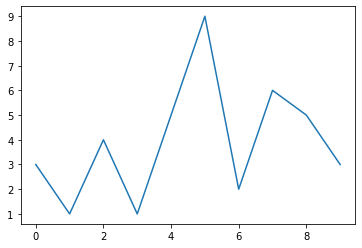

In [5]:
plt.plot(a)

### Default Layout

Notice how the library automatically included a border around the plot
* there are legends and "tick marks" on the $x$ and $y$ axes
* there is a little white space as "padding" on both axes

### Another Example 

This expression uses **list comprehension** to create a list of 100 random numbers
* see the notebook named `comprehensions.ipynb`

In [6]:
a = [ randint(20,70) for i in range(100) ]

Here are the first 20 numbers in the list:

In [7]:
print(a[:20])

[63, 45, 69, 20, 68, 33, 45, 30, 67, 63, 31, 22, 28, 64, 48, 29, 59, 36, 68, 63]


And here is a plot where $y$ values are the random numbers:

In [8]:
plt.plot(a)

## Building a Plot in Stages

We can call several graphics functions in one code cell
* first call `plot` to make the drawing
* call additional functions to add labels, set range of values, _etc_
* call `show` to display the drawing

In [16]:
a = [ randint(20,70) for i in range(25) ]

plt.plot(a)
plt.ylabel('random value')
plt.xlabel('experiment')
plt.title('Demonstration')
plt.axis([-1, len(a), 0, 100])
plt.show()

### Details 

Call `xlabel`, `ylabel`, and `title` to add labels to the plot

Pass a list of 4 numbers to `axis`:
* the first two specify the minimum and maximum value for the $x$-axis
* the second two specify minimum and maximum for the $y$-axis

In this example we chose values that give some "room" around the data
* list indices are 0 to $n-1$ so the $x$-axis ranges from -1 to $n$
* data values range from 20 to 70 but we set the $y$-axis range as 0 to 100

## Saving Figures in a File

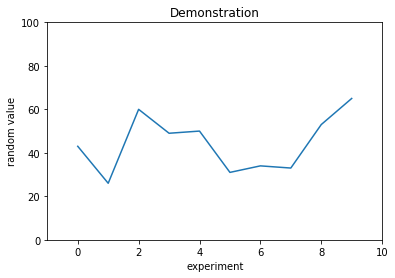

In [15]:
a = [ randint(20,70) for i in range(10) ]

plt.plot(a)
plt.ylabel('random value')
plt.xlabel('experiment')
plt.title('Demonstration')
plt.axis([-1, len(a), 0, 100])
plt.savefig('plotdemo.pdf')

Call `savefig` instead of `show`
* pass a file name to the function
* it will figure out from the extension what sort of file to make


If you're using JupyterLab the new file will appear in the directory listing on the left side of the JupyterLab window
* double-click on the file name to view the file in a new panel

### Aside:  PDF _vs_ PNG 

PNG ("portable network graphics") was designed for image data, such as photographs
* high quality colors
* transparency

PNG images can be included in a web page

PDF ("portable document format") was originally designed to be a standard for laser printers
* applications can "print to a PDF file" to save a form that can be printed or viewed later
* use PDF when you send a document (_e.g._ to your committee members, not all of whom have the same text processing application or same fonts you have on your system)

PDF images can be scaled and can show much more data

#### Live Demo 

Change ".png" to ".pdf" in the code cell above

Open both files (`plotdemo.pdf` and `plotdemo.png`) in Preview or another app that can display graphics files

## Plotting a Function 

To plot a function $f$:
* define a list of $x$ values
* make a list of $y$ values by computing $f(x)$ for every $x$
* pass both lists to `plot`

### Example:  Make a Plot of $\mathrm{sin}(x)$ for $0 <= x <= 10$ 

First make a list of $x$ values that are close to each other
* example:  `[0, 0.1, 0.2, 0.3, ...  9.8, 9.9]`

Then make another list with the corresponding `sin` values
* `[sin(0), sin(0.1), ...]`

#### Question:  How Can I Make a List of $x$-Coordinates?

If we want to make a list of $n$ points in the range from $a$ to $b$ we want the distance between points to be $$d = (b-a)/n$$

* the first point is at $a$
* the second is $a + 1/d$
* the third is $a + 2/d$

**Examples**

10 points in the range 5 to 6: $d$ is 1/10 and the points are `[5.0, 5.1, 5.2, ... 5.9]`

100 points from 0 to 10: $d$ is 1/10 and the points are  `[0, 0.1, 0.2, ... 9.9]`

In Python:
```
d = (b-a)/n
[ a + i*d for i in range(n) ]
```

#### A list of 100 points between 0 and 10

In [18]:
d = 10 / 100
x = [ i*d for i in range(100) ]

In [20]:
print(x[:5])

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4]


#### The Plot

Now that we have the $x$ coordinates we can make the corresponding $y$ values:

In [21]:
y = [ sin(theta) for theta in x ]

In [22]:
print(y[0:5])

[0.0, 0.09983341664682815, 0.19866933079506122, 0.2955202066613396, 0.3894183423086505]


In [23]:
sin(0.2)

0.19866933079506122

Now pass two arguments in the call to `plot`
* the lists should be the same length
* the first will be the set of $x$ coordinates
* the second is the list of $y$ coordinates

In [24]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A sine wave')
plt.axis([-2, 12, -1.5, 1.5])
plt.grid(True)                   # <- new function: add grid lines to the plot
plt.show()

## Multiple Lines (and More Decorations) 

We can call `plot` as many times as we want
* the first call creates the figure
* the remaining calls add "overlays"

In [25]:
x = [ n/10 for n in range(100) ]

a = [ sin(theta) for theta in x ]
b = [ cos(theta) for theta in x ]

plt.plot(x, a, '.', label='sine')        #  'b-' means blue line
plt.plot(x, b, 'r--', label='cosine')     #  'r--' means red dashed line
plt.legend(loc='lower left')
plt.axis([-2, 11, -1.5, 1.5])
plt.annotate('interesting?', xy=(2.5,a[25]), xytext=(2.5,a[25]+0.5), arrowprops={'arrowstyle':'->'})
plt.savefig('sine_waves.png')

#### Plot Style

The 3rd argument passed to `plot` is a string that specifies style options
* the first character is a color (`r` for red, `b` for blue, _etc_)
* remaining characters define plot types (solid line, dotted line, _etc_)

We'll see more options below.

#### Legend 

We can pass many more parameters to `plot`
* all subsequence parameters are `key = value` pairs

In the example above, we're passing labels in the calls to `plot`

The labels are saved and displayed later when we call the `legend` function (see the lower left of the plot above)

#### Annotations 

The `annotate` function places notes, arrows, and other items in the plot
* specify the $x$ and $y$ coordinates of where the annotation should go
* remaining arguments are style and configuration options

## Colors, Markers, and Line Styles 

The strings `b-` and `r--` in the above example are **format strings**

For more information display the help string for the `plot` function
* format strings are described in the "Notes" section

In [28]:
# ? plt.plot

#### Color 

If you want to specify something besides the default color use a 1-letter color name:
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white

If there is no color letter the default color is used.

#### Marker 

Next is a one-letter code that specfies how to draw the points:  `o` for circle, `*` for a star, `^` for a triangle, `v` for an upside down triangle, and so on (over 20 choices in all)
* none of the example so far has used markers
* the default is a "point" that is the same color and thickness as the line

#### Line Style 

The last part of the format string specifies how the points are connected:  `-` for a solid line (the default), `:` for a dotted line, `--` for a dashed line, or `-.` for alternating dashes and dots.

### Examples 

This figure has three lines:
* blue solid lines connecting filled in circles
* green dotted line with no markers
* red star markers with no connecting lines

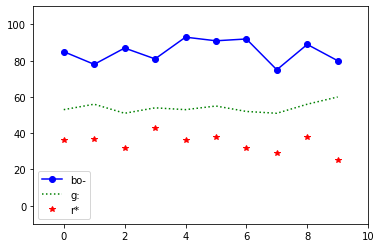

In [17]:
a = [ randint(75,95) for i in range(10) ]
b = [ randint(50,60) for i in range(10) ]
c = [ randint(25,45) for i in range(10) ]

plt.plot(a, 'bo-', label="bo-")
plt.plot(b, 'g:', label="g:")
plt.plot(c, 'r*', label="r*")
plt.legend(loc='lower left')
plt.axis([-1, len(a), -10, 110])
plt.show()

## Keyword Arguments 

We can also specify line styles (and many more options) as keyword arguments 
* include `name = value` in the call, following the other arguments
* separate multiple arguments by commas
* keyword arguments can be specified in any order

This convention is common for functions (like those in `pyplot`) that can take so many different options
* it would be pretty tedious to specify every option on every call

### Example 

The plot below is a drawing of the sigmoid function:
$$
S(x) = \frac{1}{1 + e^{-x}}
$$

A function named `exp` in Python's math library will compute $e^x$

In [30]:
exp(1)

2.718281828459045

In [31]:
exp(2)

7.38905609893065

In [32]:
exp(-2)

0.1353352832366127

We want to draw the function with a thick line (2 pixels wide) and using the color named "dark blue":

In [26]:
x = [ (n/10 - 5.0) for n in range(100) ]
y = [ 1/(1 + exp(-pt)) for pt in x ]

plt.plot(x, y, linewidth=5, color='darkblue')
plt.axis([-6, 6, -0.1, 1.1])
plt.show()

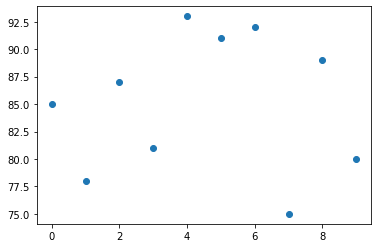

In [18]:
plt.plot(a, 'o')

## More About Colors 

The argument for the `color` option in the example above is a string:
```
plt.plot(x, y, linewidth=2, color='darkblue')
```

That brings up a question:  what color names can we use?

### Import the Color Name Table

One way to find out:  import the names from the library

In [20]:
from matplotlib.colors import CSS4_COLORS as colors

In [21]:
type(colors)

dict

Nice, a dictionary, we know how to use those....

In [22]:
len(colors)

148

In [37]:
# list(colors.keys())

In [38]:
colors['green']

'#008000'

In [41]:
for c in ['red','orange','green','yellow','blue','indigo','violet']:
    print(c, colors[c])

red #FF0000
orange #FFA500
green #008000
yellow #FFFF00
blue #0000FF
indigo #4B0082
violet #EE82EE


In [42]:
for c in colors:
    if 'blue' in c:
        print(c)

aliceblue
blue
blueviolet
cadetblue
cornflowerblue
darkblue
darkslateblue
deepskyblue
dodgerblue
lightblue
lightskyblue
lightsteelblue
mediumblue
mediumslateblue
midnightblue
powderblue
royalblue
skyblue
slateblue
steelblue


### Question:  How Can I Print the Names of All the Shades of Blue? 

Tell me what to type so I see the names (and maybe the color values) for all the different shades of blue:
```
>>> ???
aliceblue            #F0F8FF
blue                 #0000FF
blueviolet           #8A2BE2
...
```

### Answer 1 

Use a `for` loop that iterates over all color names

In [43]:
for c in colors:
    if 'blue' in c:
        print('{:20s} {:s}'.format(c, colors[c]))

aliceblue            #F0F8FF
blue                 #0000FF
blueviolet           #8A2BE2
cadetblue            #5F9EA0
cornflowerblue       #6495ED
darkblue             #00008B
darkslateblue        #483D8B
deepskyblue          #00BFFF
dodgerblue           #1E90FF
lightblue            #ADD8E6
lightskyblue         #87CEFA
lightsteelblue       #B0C4DE
mediumblue           #0000CD
mediumslateblue      #7B68EE
midnightblue         #191970
powderblue           #B0E0E6
royalblue            #4169E1
skyblue              #87CEEB
slateblue            #6A5ACD
steelblue            #4682B4


### Answer 2 

Use list comprehension to make a list of names
* this examples shows that we can include a conditional as part of the `for` in a comprehension

In [44]:
blues = [c for c in colors if 'blue' in c]

In [45]:
print(blues)

['aliceblue', 'blue', 'blueviolet', 'cadetblue', 'cornflowerblue', 'darkblue', 'darkslateblue', 'deepskyblue', 'dodgerblue', 'lightblue', 'lightskyblue', 'lightsteelblue', 'mediumblue', 'mediumslateblue', 'midnightblue', 'powderblue', 'royalblue', 'skyblue', 'slateblue', 'steelblue']


In [46]:
len(blues)

20

## Dot Plots 

The `plot` function can be used to make a "dot plot"
* draw a series of "glyphs"
* leave out the line type in the format spec so the points are not connected

**Note:** all the points will have the same size, color, and shape
* we can call `plot` multiple times, to overlay multiple data sets, but within a set each point will look the same

In the next notebook we'll see a function named `scatter` that produces more sophisticated plots
* example: the size or color of a point can vary according to some other attribute of the data


In [47]:
?uniform

Signature: uniform(a, b)
Docstring: Get a random number in the range [a, b) or [a, b] depending on rounding.
File:      /opt/conda/lib/python3.7/random.py
Type:      method


In [48]:
uniform(1,10)

6.401168885440649

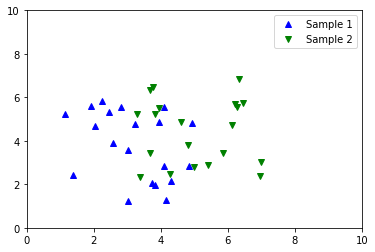

In [49]:
x1 = [uniform(1, 5) for i in range(20)]
y1 = [uniform(1, 6) for i in range(20)]

x2 = [uniform(3, 7) for i in range(20)]
y2 = [uniform(2, 7) for i in range(20)]

plt.plot(x1, y1, 'b^', label='Sample 1')
plt.plot(x2, y2, 'gv', label='Sample 2')

plt.axis([0,10,0,10])
plt.legend(loc='upper right')
plt.show()